#### Cleavelenad data set


Attributes description: 
     
- age: age in years
- sex: sex (1 = male; 0 = female) 
- cp: chest pain type
        -- Value 1: typical angina
        -- Value 2: atypical angina
        -- Value 3: non-anginal pain
        -- Value 4: asymptomatic
- trestbps: resting blood pressure (in mm Hg on admission to the hospital)
- chol: serum cholestoral in mg/dl 
- fbs: (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false) 
- restecg: resting electrocardiographic results
        -- Value 0: normal
        -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST 
                    elevation or depression of > 0.05 mV)
        -- Value 2: showing probable or definite left ventricular hypertrophy
                    by Estes' criteria
- thalach: maximum heart rate achieved 
- exang: exercise induced angina (1 = yes; 0 = no)
- oldpeak = ST depression induced by exercise relative to rest
- slope: the slope of the peak exercise ST segment
        -- Value 1: upsloping
        -- Value 2: flat
        -- Value 3: downsloping
- ca: number of major vessels (0-3) colored by flourosopy
- thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
- num: diagnosis of heart disease (angiographic disease status)
  The "num" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4. Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0).

        
    

2: Type.			Classification	

3: Origin.			Real world

4: Instances.		462

5: Features.		13

6: Classes.			4	

7: Missing values.	No

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime, date # helpful library for handling date information.
import random

import matplotlib.pyplot as plt 
plt.close('all')
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
import xgboost as xgb

from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = "all"

#AUC ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

random.seed(123)

/Users/kamakshibansal/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
# Adjust pandas display and formatting settings

# Remove scientific notations and display numbers with 2 decimal points instead
pd.options.display.float_format = '{:,.2f}'.format        

# # Increase cell width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:98% !important; }</style>"))

# # Update default style
sns.set_style(style='darkgrid')

In [3]:
import warnings
warnings.filterwarnings('ignore') #to ignore the warnings


In [4]:
#Now, our data is loaded. We're writing the following snippet to see the loaded data. The purpose here is to see the top five of the loaded data.


df = pd.read_csv('processed.cleveland.data',sep = ',', names = ['Age', 'Sex', 'Cp', 'Trestbps',
                                                                'Chol', 'Fbs', 'Restecg', 'thalach', 'Exang', 'Oldpeak', 'Slope', 'CA','Thal', 'num'])
df.head()

,Age,Sex,Cp,Trestbps,Chol,Fbs,Restecg,thalach,Exang,Oldpeak,Slope,CA,Thal,num
0,63.00,1.00,1.00,145.00,233.00,1.00,2.00,150.00,0.00,2.30,3.00,0.0,6.0,0
1,67.00,1.00,4.00,160.00,286.00,0.00,2.00,108.00,1.00,1.50,2.00,3.0,3.0,2
2,67.00,1.00,4.00,120.00,229.00,0.00,2.00,129.00,1.00,2.60,2.00,2.0,7.0,1
3,37.00,1.00,3.00,130.00,250.00,0.00,0.00,187.00,0.00,3.50,3.00,0.0,3.0,0
4,41.00,0.00,2.00,130.00,204.00,0.00,2.00,172.00,0.00,1.40,1.00,0.0,3.0,0


As mentioned in the Attributes description: Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0). Let's coming 1,2,3,4 by 1 (presence of disease) in a new column as Target

In [5]:
# As mentioned in the Attributes description: Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0). 
# Let's combine 1,2,3,4 by 1 (presence of disease) in a new column as Heart_disease

df['num'] = df['num'].replace([1,2,3,4], 1)

df['num'].value_counts()
# #Rename the num column to target 
df=df.rename( columns = {'num':'Heart_disease'})
df.head()

0    164
1    139
Name: num, dtype: int64

,Age,Sex,Cp,Trestbps,Chol,Fbs,Restecg,thalach,Exang,Oldpeak,Slope,CA,Thal,Heart_disease
0,63.00,1.00,1.00,145.00,233.00,1.00,2.00,150.00,0.00,2.30,3.00,0.0,6.0,0
1,67.00,1.00,4.00,160.00,286.00,0.00,2.00,108.00,1.00,1.50,2.00,3.0,3.0,1
2,67.00,1.00,4.00,120.00,229.00,0.00,2.00,129.00,1.00,2.60,2.00,2.0,7.0,1
3,37.00,1.00,3.00,130.00,250.00,0.00,0.00,187.00,0.00,3.50,3.00,0.0,3.0,0
4,41.00,0.00,2.00,130.00,204.00,0.00,2.00,172.00,0.00,1.40,1.00,0.0,3.0,0


In [6]:
df['Heart_disease'].value_counts(normalize= True)

0   0.54
1   0.46
Name: Heart_disease, dtype: float64

In [7]:
# df.to_csv("heart.csv")

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
Age              303 non-null float64
Sex              303 non-null float64
Cp               303 non-null float64
Trestbps         303 non-null float64
Chol             303 non-null float64
Fbs              303 non-null float64
Restecg          303 non-null float64
thalach          303 non-null float64
Exang            303 non-null float64
Oldpeak          303 non-null float64
Slope            303 non-null float64
CA               303 non-null object
Thal             303 non-null object
Heart_disease    303 non-null int64
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
Age              303 non-null float64
Sex              303 non-null float64
Cp               303 non-null float64
Trestbps         303 non-null float64
Chol             303 non-null float64
Fbs              303 non-null float64
Restecg          303 non-null float64
thalach          303 non-null float64
Exang            303 non-null float64
Oldpeak          303 non-null float64
Slope            303 non-null float64
CA               303 non-null object
Thal             303 non-null object
Heart_disease    303 non-null int64
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


#### Since CA and Thal columns are numeric and still the data type is object, let's explore them further

In [10]:
df.CA.value_counts()

df[df["CA"]=='?'] #Printing those rows where there are non-numeric values.

0.0    176
1.0     65
2.0     38
3.0     20
?        4
Name: CA, dtype: int64

,Age,Sex,Cp,Trestbps,Chol,Fbs,Restecg,thalach,Exang,Oldpeak,Slope,CA,Thal,Heart_disease
166,52.00,1.00,3.00,138.00,223.00,0.00,0.00,169.00,0.00,0.00,1.00,?,3.0,0
192,43.00,1.00,4.00,132.00,247.00,1.00,2.00,143.00,1.00,0.10,2.00,?,7.0,1
287,58.00,1.00,2.00,125.00,220.00,0.00,0.00,144.00,0.00,0.40,2.00,?,7.0,0
302,38.00,1.00,3.00,138.00,175.00,0.00,0.00,173.00,0.00,0.00,1.00,?,3.0,0


In [11]:
# Since, we just have 303 rows in our dataset, removing 4 rows which will be 1.32% of the data, will not be a good idea. Let's replace these non-numberic values by mode of CA.
df.CA.mode()
df["CA"]= df["CA"].replace("?", "0.0")
df.CA.value_counts()

0    0.0
dtype: object

0.0    180
1.0     65
2.0     38
3.0     20
Name: CA, dtype: int64

In [12]:
# df.iloc[166, :]

In [13]:
#Similarly, let's replace the non-numberic values by mode of Thal column.

df["Thal"].value_counts()
df["Thal"]= df["Thal"].replace("?", "3.0")
df["Thal"].value_counts()

3.0    166
7.0    117
6.0     18
?        2
Name: Thal, dtype: int64

3.0    168
7.0    117
6.0     18
Name: Thal, dtype: int64

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,303.00,54.44,9.04,29.00,48.00,56.00,61.00,77.00
Sex,303.00,0.68,0.47,0.00,0.00,1.00,1.00,1.00
Cp,303.00,3.16,0.96,1.00,3.00,3.00,4.00,4.00
Trestbps,303.00,131.69,17.60,94.00,120.00,130.00,140.00,200.00
Chol,303.00,246.69,51.78,126.00,211.00,241.00,275.00,564.00
Fbs,303.00,0.15,0.36,0.00,0.00,0.00,0.00,1.00
Restecg,303.00,0.99,0.99,0.00,0.00,1.00,2.00,2.00
thalach,303.00,149.61,22.88,71.00,133.50,153.00,166.00,202.00
Exang,303.00,0.33,0.47,0.00,0.00,0.00,1.00,1.00
Oldpeak,303.00,1.04,1.16,0.00,0.00,0.80,1.60,6.20


In [15]:
# sns.pairplot(df, hue="Heart_disease")

In [16]:
df.Chol.value_counts()

234.00    6
204.00    6
197.00    6
269.00    5
212.00    5
         ..
360.00    1
237.00    1
178.00    1
306.00    1
311.00    1
Name: Chol, Length: 152, dtype: int64

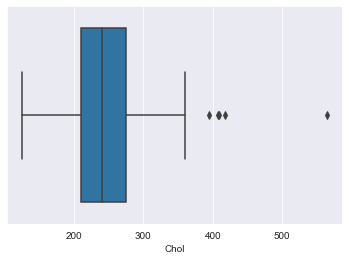

In [17]:
sns.boxplot(df["Chol"])

In [18]:
q1, q2, q3 = df["Chol"].quantile([0.25,0.5,0.75])
IQR = q3 - q1
df[df["Chol"]> q3 + 1.5*IQR]
# np.where()

,Age,Sex,Cp,Trestbps,Chol,Fbs,Restecg,thalach,Exang,Oldpeak,Slope,CA,Thal,Heart_disease
48,65.00,0.00,3.00,140.00,417.00,1.00,2.00,157.00,0.00,0.80,1.00,1.0,3.0,0
121,63.00,0.00,4.00,150.00,407.00,0.00,2.00,154.00,0.00,4.00,2.00,3.0,7.0,1
152,67.00,0.00,3.00,115.00,564.00,0.00,2.00,160.00,0.00,1.60,2.00,0.0,7.0,0
173,62.00,0.00,4.00,140.00,394.00,0.00,2.00,157.00,0.00,1.20,2.00,0.0,3.0,0
181,56.00,0.00,4.00,134.00,409.00,0.00,2.00,150.00,1.00,1.90,2.00,2.0,7.0,1


There are some outliers i.e. 5 rows greater than max whisker, we could replace these vallues either by median, 2nd quartile or the max whisker value itself.

In [19]:
df.skew()

Age             -0.21
Sex             -0.77
Cp              -0.84
Trestbps         0.71
Chol             1.14
Fbs              1.99
Restecg          0.02
thalach         -0.54
Exang            0.74
Oldpeak          1.27
Slope            0.51
CA               1.21
Thal             0.26
Heart_disease    0.17
dtype: float64

In [20]:
# Lets check for highly correlated variables
cor= df.corr()
cor.loc[:,:] = np.tril(cor,k=-1)
cor=cor.stack()
cor[(cor > 0.6) | (cor< -0.6)] 

Series([], dtype: float64)

None of the independent variables are highly correlated

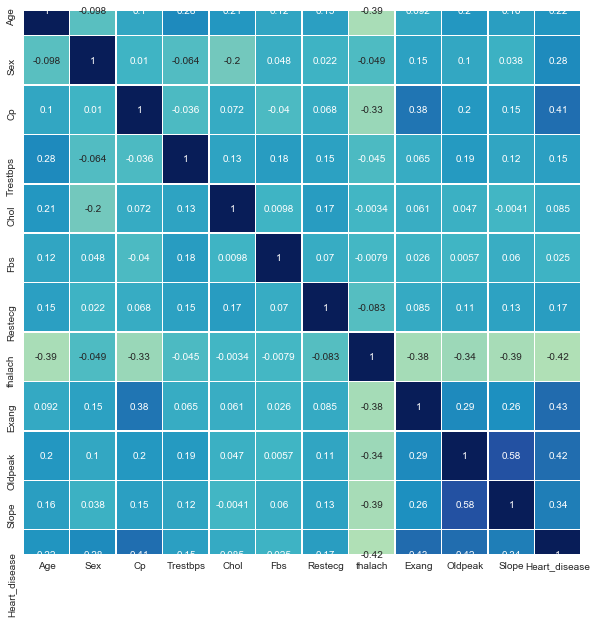

In [21]:
#Visualising correlation matrix via heatmap
plt.figure(figsize=(10,10))

sns.heatmap(df.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu")

plt.show();

# Exploratory Data Analysis

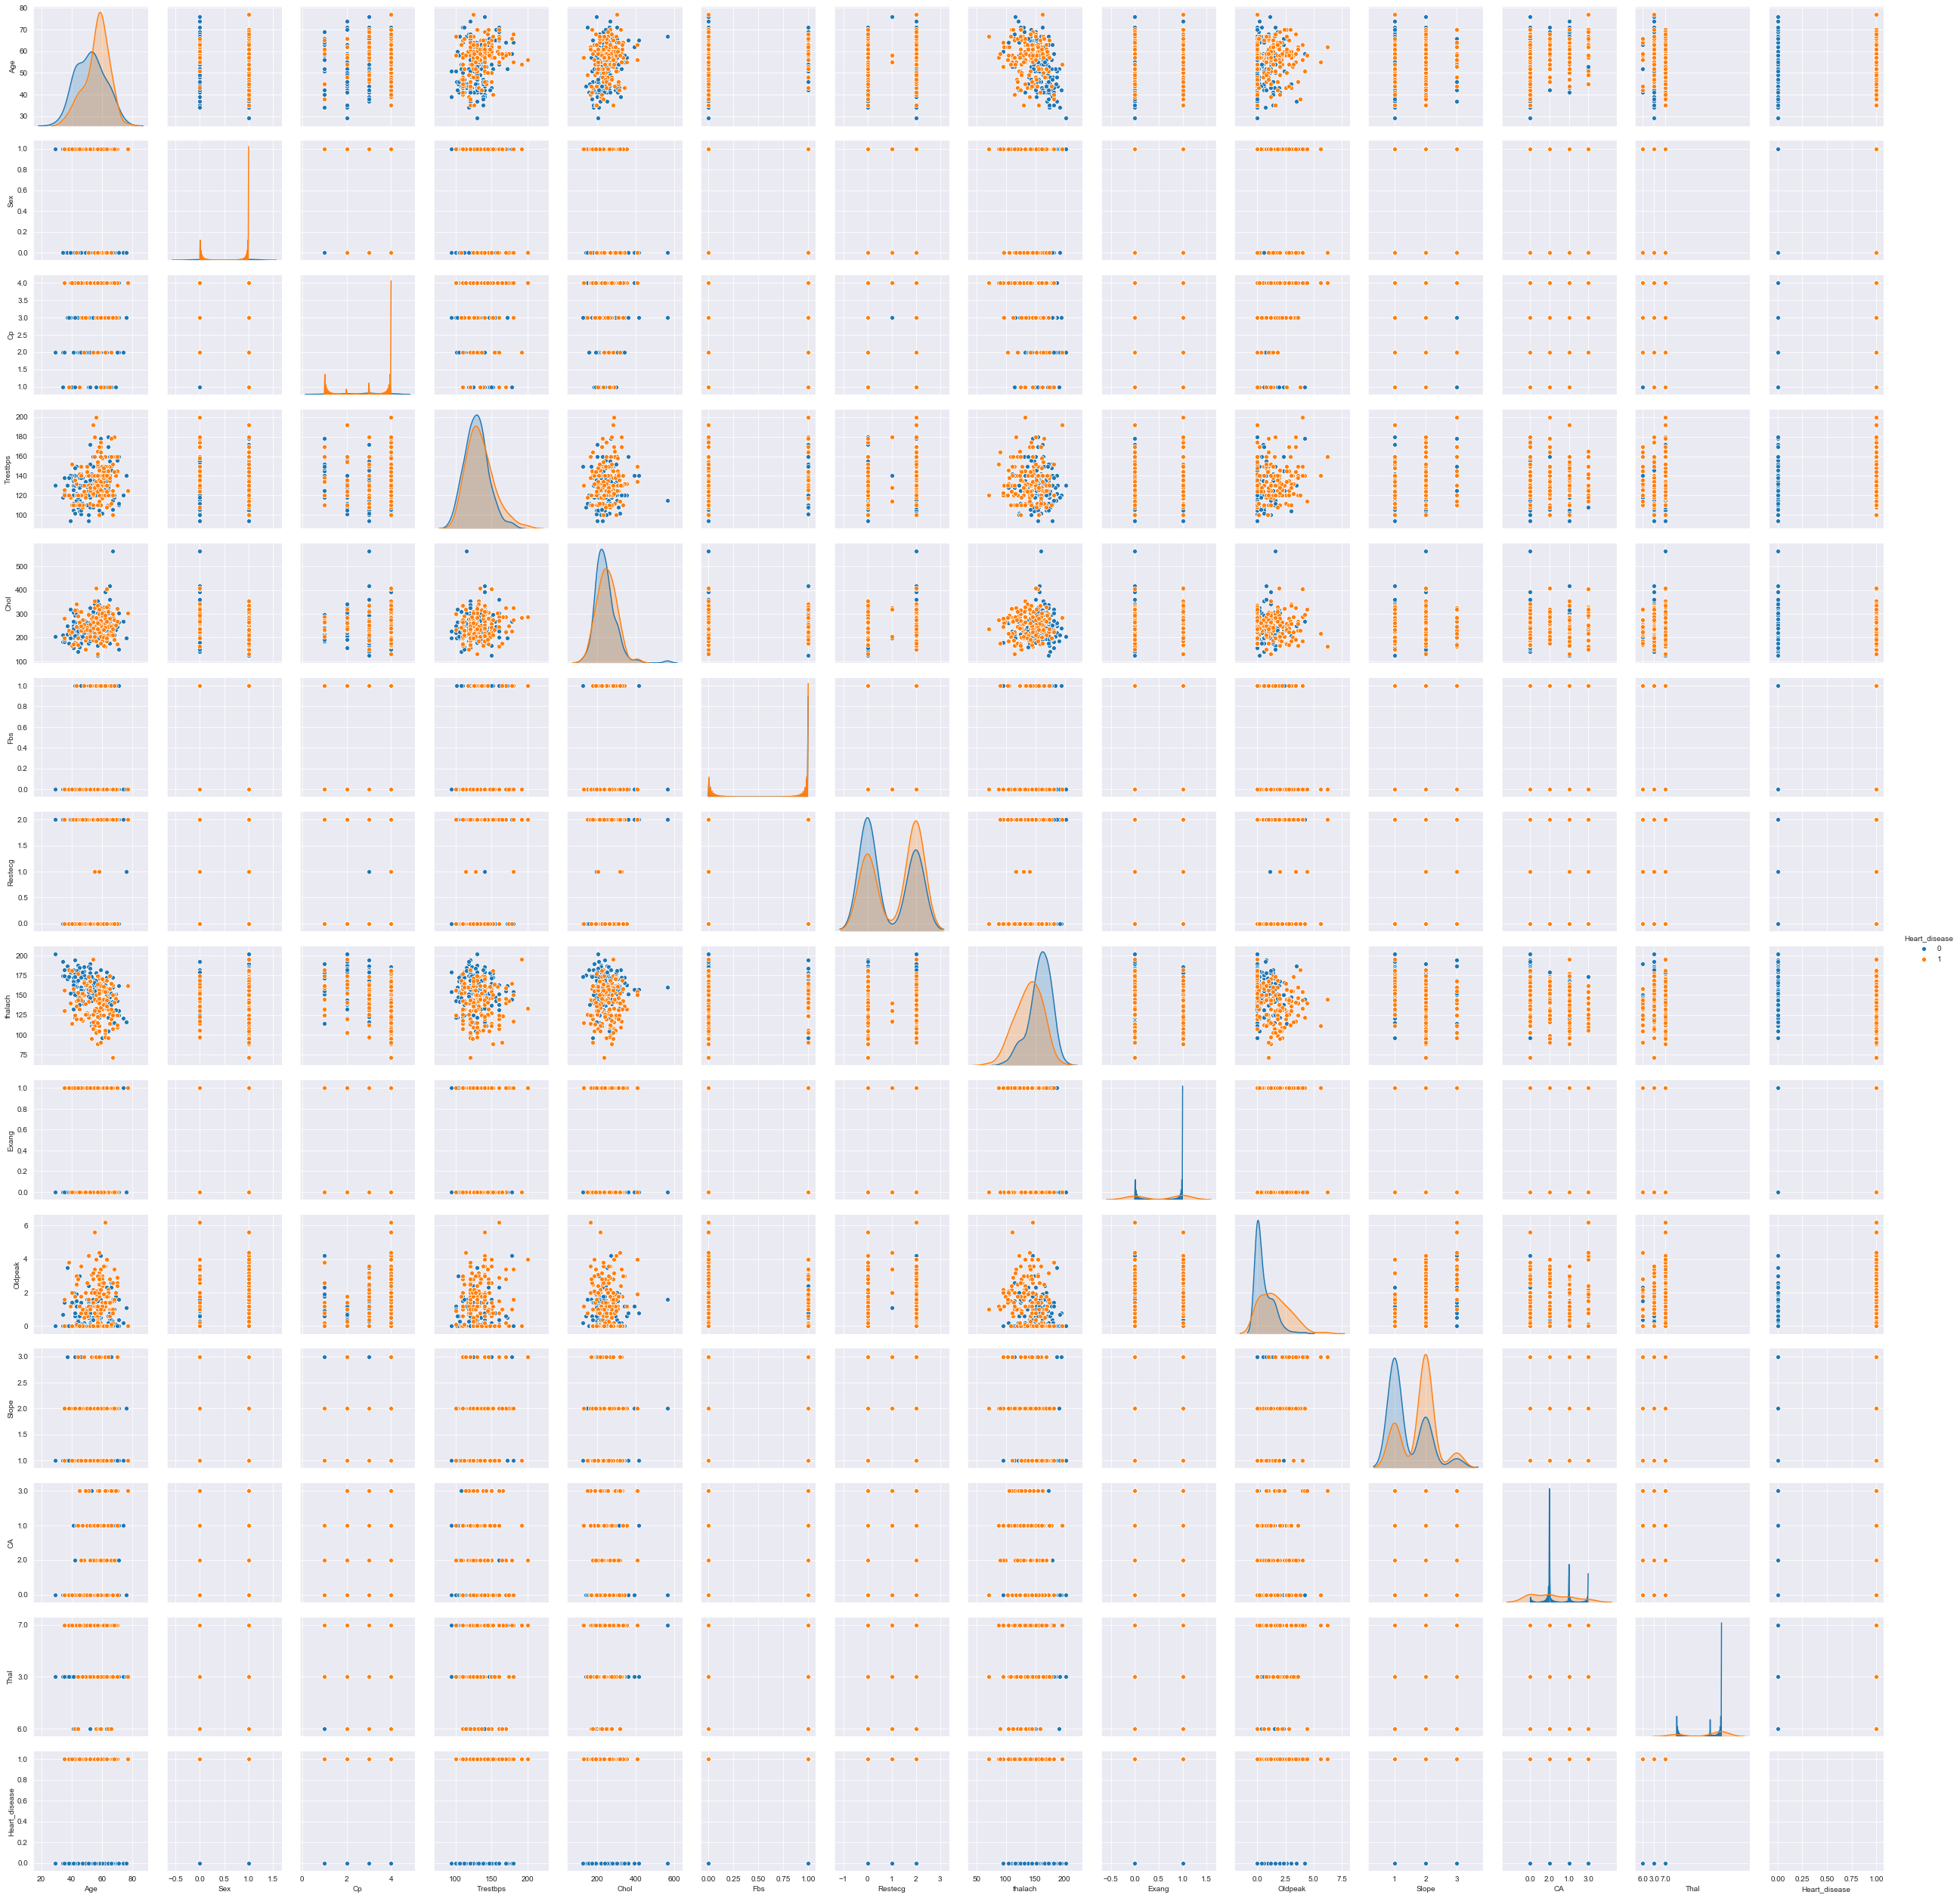

In [22]:
sns.pairplot(df, diag_kind= 'kde', hue = 'Heart_disease')
plt.show()

- None of the variables have much correlation.
- With higher Oldpeak values, it is more likely that the person will suffer from a heart disease.
- With Slope=2, more likely to have a heart disease and with Slope=1, more chances that there will be no heart disease.
- Elder people are more likely to suffer from heart disease

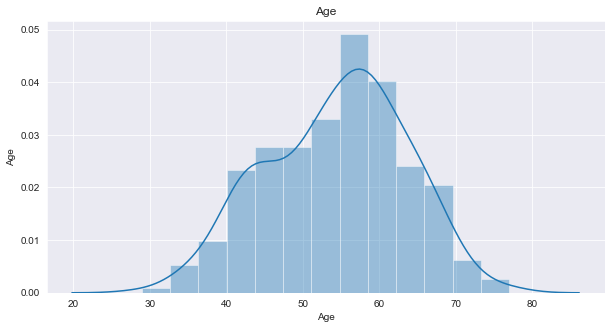

In [23]:
plt.figure(figsize=(10,5))
sns.distplot(df['Age'])
plt.ylabel('Age')
plt.title('Age');

We see that the distribution is approximately normally distributed, with most users falling into mid age category. The age in the dataset varies from 29.0 to 77.0 years



In [24]:
print("The age in the dataset varies from", min(df['Age']), "to", max(df['Age']), "years")

The age in the dataset varies from 29.0 to 77.0 years


In [25]:
df.skew()

Age             -0.21
Sex             -0.77
Cp              -0.84
Trestbps         0.71
Chol             1.14
Fbs              1.99
Restecg          0.02
thalach         -0.54
Exang            0.74
Oldpeak          1.27
Slope            0.51
CA               1.21
Thal             0.26
Heart_disease    0.17
dtype: float64

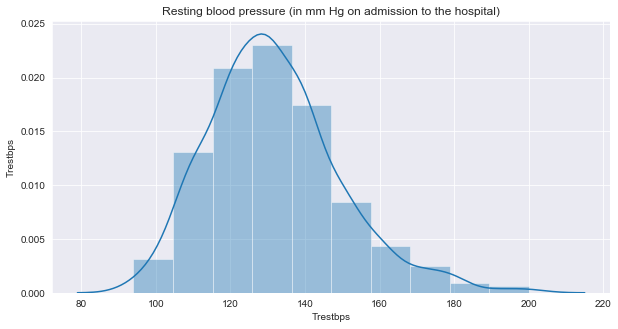

In [26]:
plt.figure(figsize=(10,5))
sns.distplot(df['Trestbps'], bins=10)
plt.ylabel('Trestbps')
plt.title('Resting blood pressure (in mm Hg on admission to the hospital)');

We see that the distribution is approximately normaly distributed.

In [27]:
print("Resting blood pressure (in mm Hg on admission to the hospital)", min(df['Trestbps']), "to", max(df['Trestbps']), "mm Hg")

Resting blood pressure (in mm Hg on admission to the hospital) 94.0 to 200.0 mm Hg


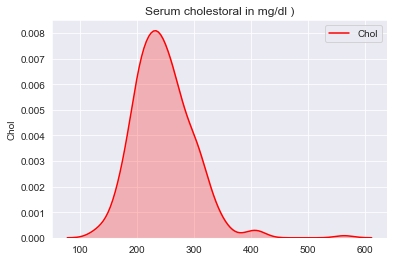

In [28]:
sns.kdeplot(df['Chol'], shade=True, color="r")
plt.ylabel('Chol')
plt.title('Serum cholestoral in mg/dl )');

In [29]:
print("Serum cholestoral varies from ", min(df['Chol']), "to", max(df['Chol']), "mg/dl")

Serum cholestoral varies from  126.0 to 564.0 mg/dl


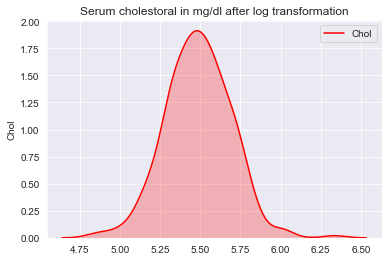

In [30]:
sns.kdeplot(np.log(df['Chol']), shade=True, color="r")
plt.ylabel('Chol')
plt.title('Serum cholestoral in mg/dl after log transformation');

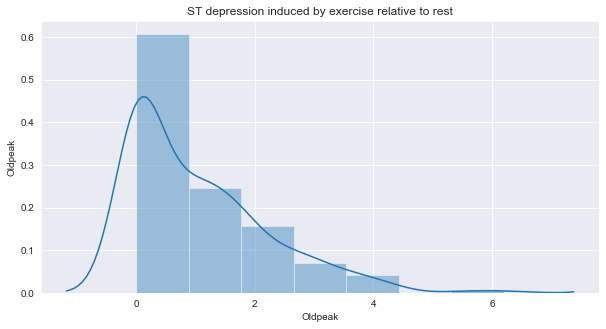

In [31]:
plt.figure(figsize=(10,5))
sns.distplot(df['Oldpeak'], bins=7)
plt.ylabel('Oldpeak')
plt.title('ST depression induced by exercise relative to rest');

In [32]:
print("ST depression induced by exercise relative to rest varies from ", min(df['Oldpeak']), "to", max(df['Oldpeak']), "mg/dl")

ST depression induced by exercise relative to rest varies from  0.0 to 6.2 mg/dl


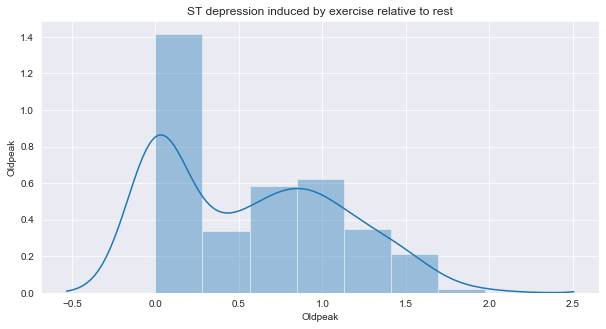

In [33]:
plt.figure(figsize=(10,5))
sns.distplot(np.log(df['Oldpeak']+1), bins=7) #adding 1, as most of the values are 0 and log is not defined on x=0.
plt.ylabel('Oldpeak')
plt.title('ST depression induced by exercise relative to rest');

In [34]:
for idx, field in enumerate(df.columns):
    print(idx)
    print(field)
    print(df[field].value_counts())


0
Age
58.00    19
57.00    17
54.00    16
59.00    14
52.00    13
60.00    12
51.00    12
56.00    11
62.00    11
44.00    11
41.00    10
64.00    10
67.00     9
63.00     9
42.00     8
43.00     8
53.00     8
65.00     8
55.00     8
61.00     8
45.00     8
46.00     7
66.00     7
50.00     7
48.00     7
47.00     5
49.00     5
39.00     4
68.00     4
35.00     4
70.00     4
69.00     3
40.00     3
71.00     3
34.00     2
37.00     2
38.00     2
74.00     1
29.00     1
77.00     1
76.00     1
Name: Age, dtype: int64
1
Sex
1.00    206
0.00     97
Name: Sex, dtype: int64
2
Cp
4.00    144
3.00     86
2.00     50
1.00     23
Name: Cp, dtype: int64
3
Trestbps
120.00    37
130.00    36
140.00    32
110.00    19
150.00    17
138.00    12
128.00    12
125.00    11
160.00    11
112.00     9
132.00     8
118.00     7
124.00     6
135.00     6
108.00     6
152.00     5
134.00     5
145.00     5
100.00     4
170.00     4
122.00     4
136.00     3
105.00     3
115.00     3
142.00     3
126.00     3

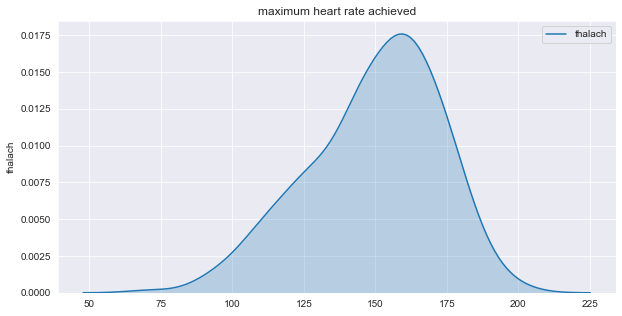

In [35]:
plt.figure(figsize=(10,5))
sns.kdeplot(df['thalach'], shade=True)
plt.ylabel('thalach')
plt.title('maximum heart rate achieved');

In [36]:
print("Maximum heart rate achieved varies from ", min(df['thalach']), "to", max(df['thalach']))

Maximum heart rate achieved varies from  71.0 to 202.0


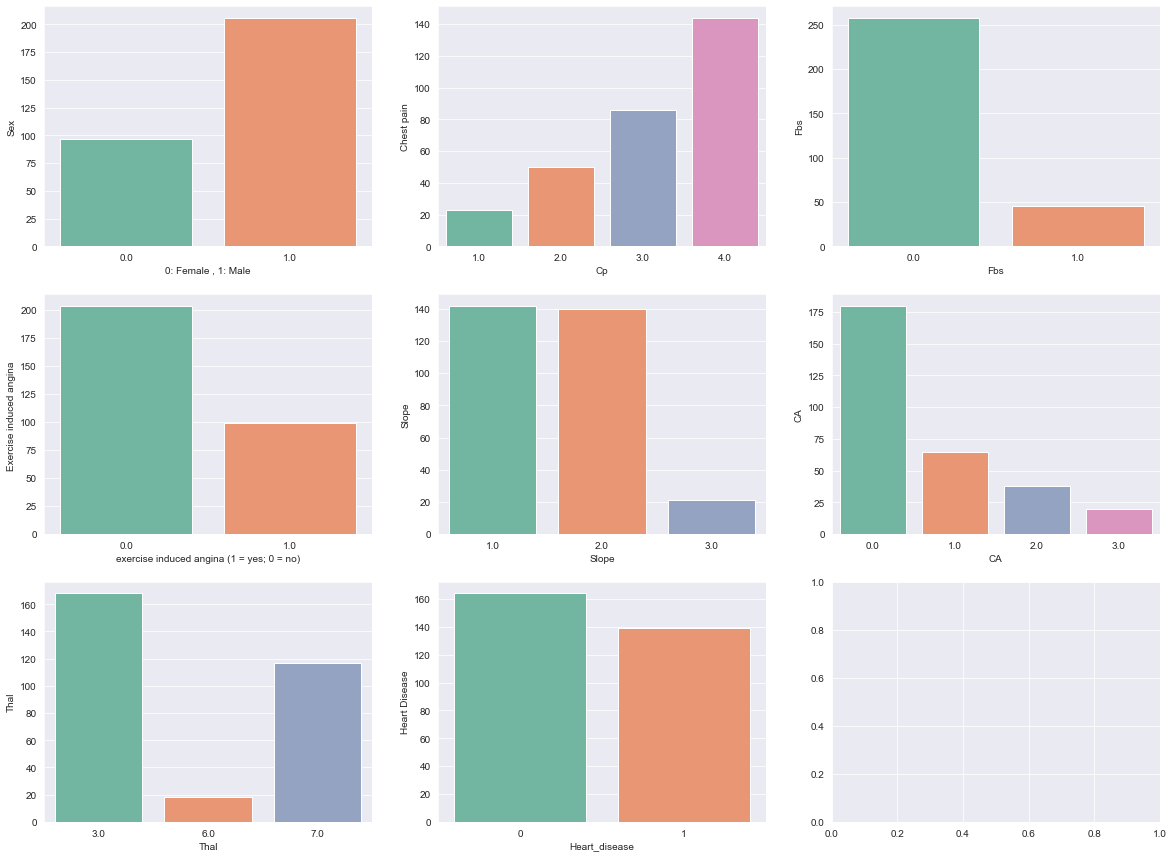

In [37]:
#Count plots for all categorical variables

fig,ax=plt.subplots(3,3,figsize=(20,15))
sns.countplot(df["Sex"], palette='Set2',ax=ax[0,0])
ax[0,0].set_xlabel("0: Female , 1: Male")
ax[0,0].set_ylabel("Sex")

sns.countplot(df["Cp"], palette='Set2',ax=ax[0,1])

ax[0,1].set_ylabel("Chest pain")

sns.countplot(df["Fbs"], palette='Set2',ax=ax[0,2])
ax[0,2].set_ylabel("Fbs")

sns.countplot(df["Exang"], palette='Set2',ax=ax[1,0])
ax[1,0].set_xlabel("exercise induced angina (1 = yes; 0 = no)")
ax[1,0].set_ylabel("Exercise induced angina ")

sns.countplot(df["Slope"], palette='Set2',ax=ax[1,1])
ax[1,1].set_ylabel("Slope")

sns.countplot(df["CA"], palette='Set2',ax=ax[1,2])
ax[1,2].set_ylabel("CA")

sns.countplot(df["Thal"], palette='Set2',ax=ax[2,0])
ax[2,0].set_ylabel("Thal")

sns.countplot(df["Heart_disease"], palette='Set2',ax=ax[2,1])
ax[2,1].set_ylabel("Heart Disease");




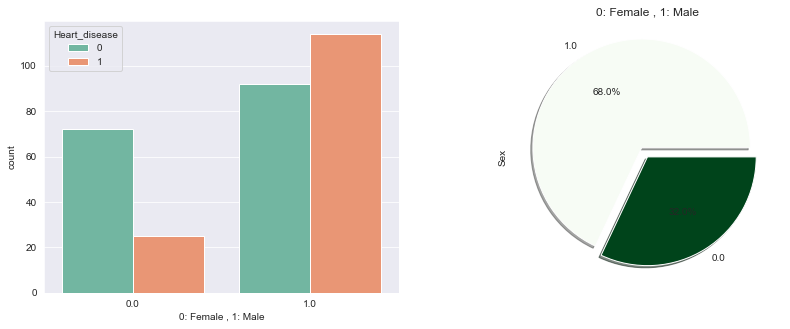

In [38]:
fig,ax=plt.subplots(1,2,figsize=(14,5))
sns.countplot(x='Sex',data=df,hue='Heart_disease',palette='Set2',ax=ax[0])
ax[0].set_xlabel("0: Female , 1: Male")
df.Sex.value_counts().plot.pie(ax=ax[1],autopct='%1.1f%%',shadow=True, explode=[0.1,0], cmap='Greens')
ax[1].set_title("0: Female , 1: Male");

There are more number of females (68%) than males (32%), but more number of males are suffering from heart disease


In [63]:
#Bivariate analysis of categorical variables with target variable.

cols=["Sex", "Cp", "Fbs", "Exang", "Slope", "CA", "Thal", "Restecg"]

for i,idx in enumerate(cols):
    print("\n \n",idx)
#     print(field)
    print ("\n Row wise")
    pd.crosstab(df[idx], df['Heart_disease'], normalize='index').sort_values(by=1,ascending=False )
    print ("\n Column wise")
    pd.crosstab(df[idx], df['Heart_disease'], normalize='columns').sort_values(by=1,ascending=False )
    print ("\n Overall")
    pd.crosstab(df[idx], df['Heart_disease'], normalize='all').sort_values(by=1,ascending=False )




 
 Sex

 Row wise


Heart_disease,0,1
Sex,,
1.00,0.45,0.55
0.00,0.74,0.26



 Column wise


Heart_disease,0,1
Sex,,
1.00,0.56,0.82
0.00,0.44,0.18



 Overall


Heart_disease,0,1
Sex,,
1.00,0.30,0.38
0.00,0.24,0.08



 
 Cp

 Row wise


Heart_disease,0,1
Cp,,
4.00,0.27,0.73
2.00,0.78,0.22
3.00,0.79,0.21



 Column wise


Heart_disease,0,1
Cp,,
4.00,0.24,0.76
3.00,0.41,0.13
2.00,0.35,0.12



 Overall


Heart_disease,0,1
Cp,,
4.00,0.13,0.35
3.00,0.22,0.06
2.00,0.19,0.05



 
 Fbs

 Row wise


Heart_disease,0,1
Fbs,,
1.00,0.51,0.49
0.00,0.55,0.45



 Column wise


Heart_disease,0,1
Fbs,,
0.00,0.86,0.84
1.00,0.14,0.16



 Overall


Heart_disease,0,1
Fbs,,
0.00,0.47,0.39
1.00,0.08,0.07



 
 Exang

 Row wise


Heart_disease,0,1
Exang,,
1.00,0.23,0.77
0.00,0.69,0.31



 Column wise


Heart_disease,0,1
Exang,,
1.00,0.14,0.55
0.00,0.86,0.45



 Overall


Heart_disease,0,1
Exang,,
1.00,0.08,0.25
0.00,0.47,0.21



 
 Slope

 Row wise


Heart_disease,0,1
Slope,,
2.00,0.35,0.65
3.00,0.43,0.57
1.00,0.75,0.25



 Column wise


Heart_disease,0,1
Slope,,
2.00,0.30,0.65
1.00,0.65,0.26
3.00,0.05,0.09



 Overall


Heart_disease,0,1
Slope,,
2.00,0.16,0.30
1.00,0.35,0.12
3.00,0.03,0.04



 
 CA

 Row wise


Heart_disease,0,1
CA,,
3.0,0.15,0.85
2.0,0.18,0.82
1.0,0.32,0.68
0.0,0.74,0.26



 Column wise


Heart_disease,0,1
CA,,
0.0,0.81,0.34
1.0,0.13,0.32
2.0,0.04,0.22
3.0,0.02,0.12



 Overall


Heart_disease,0,1
CA,,
0.0,0.44,0.16
1.0,0.07,0.15
2.0,0.02,0.10
3.0,0.01,0.06



 
 Thal

 Row wise


Heart_disease,0,1
Thal,,
7.0,0.24,0.76
6.0,0.33,0.67
3.0,0.77,0.23



 Column wise


Heart_disease,0,1
Thal,,
7.0,0.17,0.64
3.0,0.79,0.27
6.0,0.04,0.09



 Overall


Heart_disease,0,1
Thal,,
7.0,0.09,0.29
3.0,0.43,0.13
6.0,0.02,0.04



 
 Restecg

 Row wise


Heart_disease,0,1
Restecg,,
2.00,0.45,0.55
0.00,0.63,0.37



 Column wise


Heart_disease,0,1
Restecg,,
2.00,0.42,0.60
0.00,0.58,0.40



 Overall


Heart_disease,0,1
Restecg,,
2.00,0.23,0.27
0.00,0.31,0.18


- There are a greater number of females (68%) than males (32%), but interestingly, more number of males (55% of males) are suffering from heart disease whereas it is only 26% for females. 
- In the dataset, 85.1% of the people are having <120 mg/dl of sugar, out of which 49% are suffering from heart disease and but for people having sugar >120 it is slightly less i.e. 45%. 
- 47.5% of the people are suffering from asymptomatic chest pain (level 4) and 73% of patients in this category have heart disease and hence patients with level 4 chest pain are more prone to heart disease. 
- 32.7% are having exercise induced angina. People who are having anginal chest pain induced by exercise are more likely to suffer from heart disease (77% have disease)
- 46.2% of the dataset have flat as ST segment slope, and among those 65% have heart disease which is more as compared to upslopping (57% have heart disease) and downslopping (25% have heart disease). Hence, with slope as flat, people are more prone to heart diseases. 
- Since, 88.6% of patients are suffering from reversable defect, and among those 76% of patients have heart disease. Therefore, having this defect increases the chance of suffering from the heart diseases.

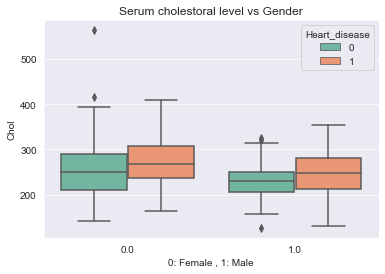

In [42]:
sns.boxplot(x="Sex",y="Chol",data=df,hue="Heart_disease", palette='Set2')
plt.xlabel("0: Female , 1: Male")
plt.title('Serum cholestoral level vs Gender');
plt.show();

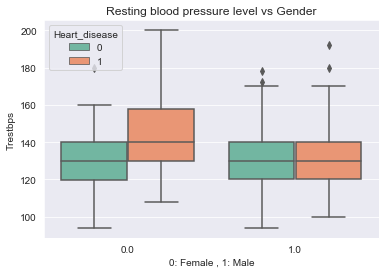

In [43]:
sns.boxplot(x="Sex",y="Trestbps",data=df,hue="Heart_disease", palette='Set2')
plt.xlabel("0: Female , 1: Male")
plt.title('Resting blood pressure level vs Gender');
plt.show();

Cholestrol levels and resting blood pressure are higher in Females and those females for sure are prone to heart diseases.
In males- higher cholestrol level people are more prone to heart disease but blood pressure is similar in both males suffering and not suffering from a heart disease.

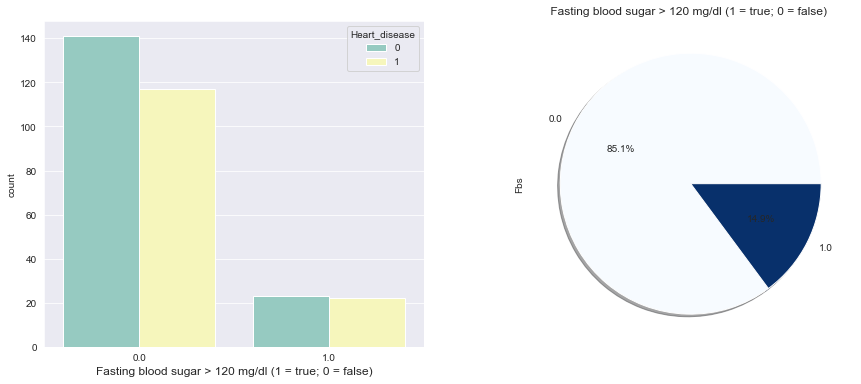

In [44]:
fig,ax=plt.subplots(1,2,figsize=(15,6))
sns.countplot(x='Fbs',data=df,hue='Heart_disease',palette='Set3',ax=ax[0])
ax[0].set_xlabel("Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)",size=12)
df.Fbs.value_counts().plot.pie(ax=ax[1],autopct='%1.1f%%',shadow=True,cmap='Blues')
ax[1].set_title(" Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)  ",size=12);

85.1% of the people are having less than 120 mg/dl of sugar and surprisingly they are suffering from heart disease but >120 are not suffering from heart disease. 
Only 14.9 % of people have >120mg/dl of sugar

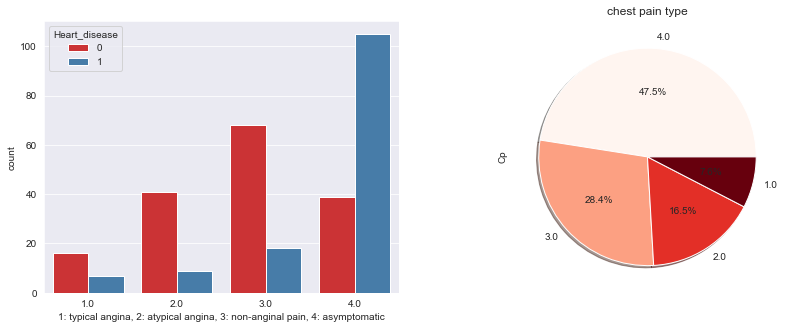

In [45]:
fig,ax=plt.subplots(1,2,figsize=(14,5))
sns.countplot(x='Cp',data=df,hue='Heart_disease',palette='Set1',ax=ax[0])
ax[0].set_xlabel("1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic")
df.Cp.value_counts().plot.pie(ax=ax[1],autopct='%1.1f%%',shadow=True,  cmap='Reds')
ax[1].set_title("chest pain type");

47.5% of people are suffering from  asymptomatic chest pain (level 4) and are ones which are suffering more from the heart disease. 

Category 1 and 2 i.e. people suffering from typical and atypical angina are very less in number, hence it would make sense to club these low volume categories together.

In [46]:
df["Cp"].value_counts(normalize=True)

4.00   0.48
3.00   0.28
2.00   0.17
1.00   0.08
Name: Cp, dtype: float64

In [47]:
df.loc[((df['Cp'] == 1) | (df['Cp'] == 2)), 'Cp'] = 2

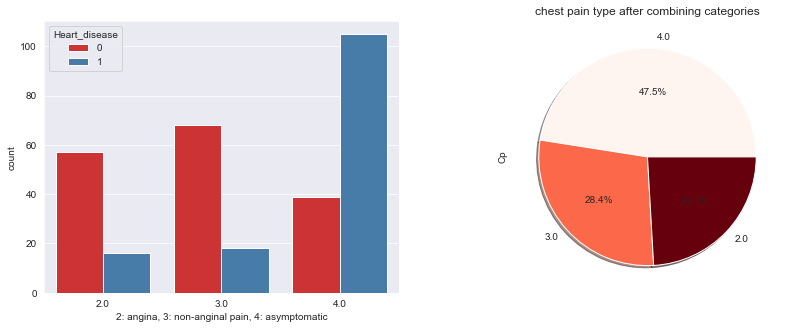

In [48]:
fig,ax=plt.subplots(1,2,figsize=(14,5))
sns.countplot(x='Cp',data=df,hue='Heart_disease',palette='Set1',ax=ax[0])
ax[0].set_xlabel( "2: angina, 3: non-anginal pain, 4: asymptomatic")
df.Cp.value_counts().plot.pie(ax=ax[1],autopct='%1.1f%%',shadow=True,  cmap='Reds')
ax[1].set_title("chest pain type after combining categories");

In [49]:
df["Cp"].value_counts(normalize=True) # Now 2 refers to having angina chest pain combining both typical and atypical categories

4.00   0.48
3.00   0.28
2.00   0.24
Name: Cp, dtype: float64

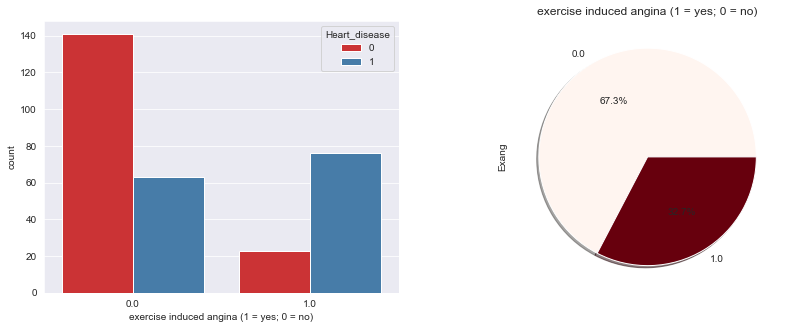

In [50]:
fig,ax=plt.subplots(1,2,figsize=(14,5))
sns.countplot(x='Exang',data=df,hue='Heart_disease',palette='Set1',ax=ax[0])
ax[0].set_xlabel("exercise induced angina (1 = yes; 0 = no)")
df.Exang.value_counts().plot.pie(ax=ax[1],autopct='%1.1f%%',shadow=True,  cmap='Reds')
ax[1].set_title("exercise induced angina (1 = yes; 0 = no)");

People who are having anginal chest pain induced by exercise are more likely to suffer from heart diseases though only 32.7% are having exercise induced angina.

In [51]:
df.Restecg.value_counts(normalize=True)

0.00   0.50
2.00   0.49
1.00   0.01
Name: Restecg, dtype: float64

In [52]:
df[(df["Exang"]==1) & (df["Cp"]==3)] 



,Age,Sex,Cp,Trestbps,Chol,Fbs,Restecg,thalach,Exang,Oldpeak,Slope,CA,Thal,Heart_disease
12,56.00,1.00,3.00,130.00,256.00,1.00,2.00,142.00,1.00,0.60,2.00,1.0,6.0,1
34,44.00,1.00,3.00,130.00,233.00,0.00,0.00,179.00,1.00,0.40,1.00,0.0,3.0,0
39,61.00,1.00,3.00,150.00,243.00,1.00,0.00,137.00,1.00,1.00,2.00,0.0,3.0,0
61,46.00,0.00,3.00,142.00,177.00,0.00,2.00,160.00,1.00,1.40,3.00,0.0,3.0,0
83,68.00,1.00,3.00,180.00,274.00,1.00,2.00,150.00,1.00,1.60,2.00,0.0,7.0,1
122,51.00,1.00,3.00,100.00,222.00,0.00,0.00,143.00,1.00,1.20,2.00,0.0,3.0,0
131,51.00,1.00,3.00,94.00,227.00,0.00,0.00,154.00,1.00,0.00,1.00,1.0,7.0,0
143,64.00,1.00,3.00,125.00,309.00,0.00,0.00,131.00,1.00,1.80,2.00,0.0,7.0,1
144,58.00,1.00,3.00,105.00,240.00,0.00,2.00,154.00,1.00,0.60,2.00,0.0,7.0,0
170,70.00,1.00,3.00,160.00,269.00,0.00,0.00,112.00,1.00,2.90,2.00,1.0,7.0,1


It is strange that there are 11 rows having non-anginal pain (value=3) in chest pain column, still having Exang as 1. This might be some error in reporting.

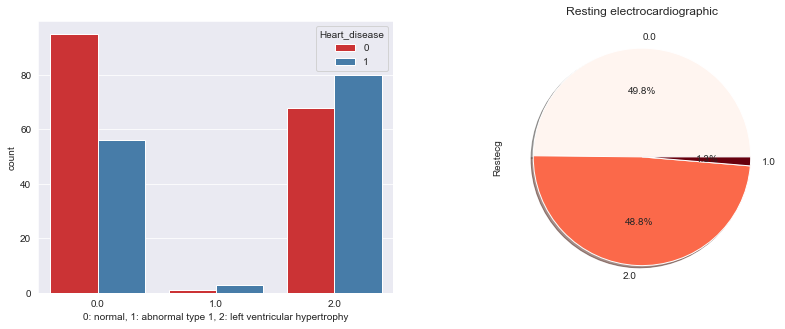

In [53]:
fig,ax=plt.subplots(1,2,figsize=(14,5))
sns.countplot(x='Restecg',data=df,hue='Heart_disease',palette='Set1',ax=ax[0])
ax[0].set_xlabel("0: normal, 1: abnormal type 1, 2: left ventricular hypertrophy")
df.Restecg.value_counts().plot.pie(ax=ax[1],autopct='%1.1f%%',shadow=True,  cmap='Reds')
ax[1].set_title("Resting electrocardiographic");

people who are showing probable or definite left ventricular hypertrophy by Estes' criteria are more likely to suffer from heart disease whereas people having ST-T wave abnormality are less likely to have heart disease but these accounts to only 1% of the dataset.

Since, the categories 1 and 2 i.e. people having 1: ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) & 2: showing probable or definite left ventricular hypertrophy by Estes' criteria are very less in number, hence it would make sense to club these low volume categories together to category 1: abnormal electrocardiographic results

In [54]:
df.loc[((df['Restecg'] == 1) | (df['Restecg'] == 2)), 'Restecg'] = 2

In [55]:
df['Restecg'].value_counts() # 1: abnormal   # 0: normal

2.00    152
0.00    151
Name: Restecg, dtype: int64

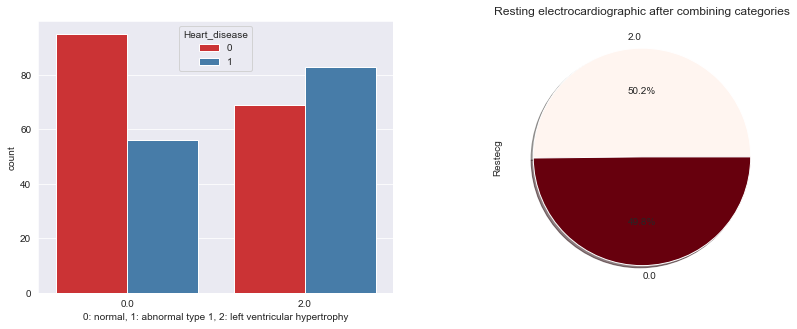

In [56]:
fig,ax=plt.subplots(1,2,figsize=(14,5))
sns.countplot(x='Restecg',data=df,hue='Heart_disease',palette='Set1',ax=ax[0])
ax[0].set_xlabel("0: normal, 1: abnormal type 1, 2: left ventricular hypertrophy")
df.Restecg.value_counts().plot.pie(ax=ax[1],autopct='%1.1f%%',shadow=True,  cmap='Reds')
ax[1].set_title("Resting electrocardiographic after combining categories");

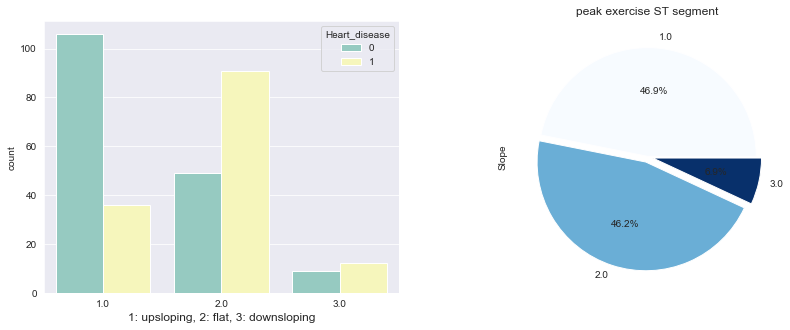

In [57]:

fig,ax=plt.subplots(1,2,figsize=(14,5))
sns.countplot(x='Slope',data=df,hue='Heart_disease',palette='Set3',ax=ax[0])
ax[0].set_xlabel("1: upsloping, 2: flat, 3: downsloping",size=12)
df.Slope.value_counts().plot.pie(ax=ax[1],autopct='%1.1f%%',explode=[0.005,0.05,0.05],cmap='Blues')
ax[1].set_title("peak exercise ST segment",size=12);

People having flat  as ST segment slope are more prone to heart disease than upslopping and downslopping and this accounts to 46.2% of the dataset.

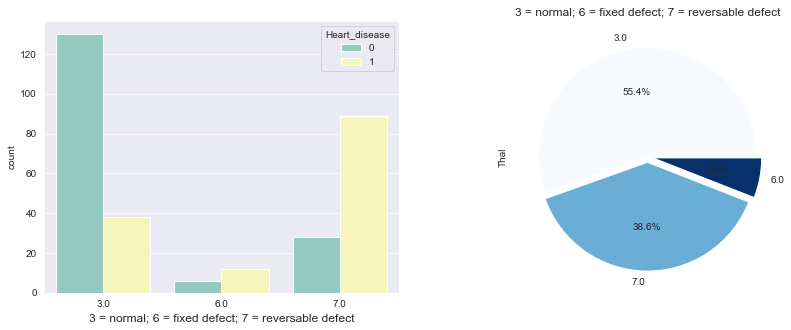

In [58]:
fig,ax=plt.subplots(1,2,figsize=(14,5))
sns.countplot(x='Thal',data=df,hue='Heart_disease',palette='Set3',ax=ax[0])
ax[0].set_xlabel("3 = normal; 6 = fixed defect; 7 = reversable defect",size=12)
df.Thal.value_counts().plot.pie(ax=ax[1],autopct='%1.1f%%',explode=[0.005,0.05,0.05],cmap='Blues')
ax[1].set_title("3 = normal; 6 = fixed defect; 7 = reversable defect",size=12);

People suffering from reversable defect are more prone to heart diseases and this comprise of 88.6% of the dataset.


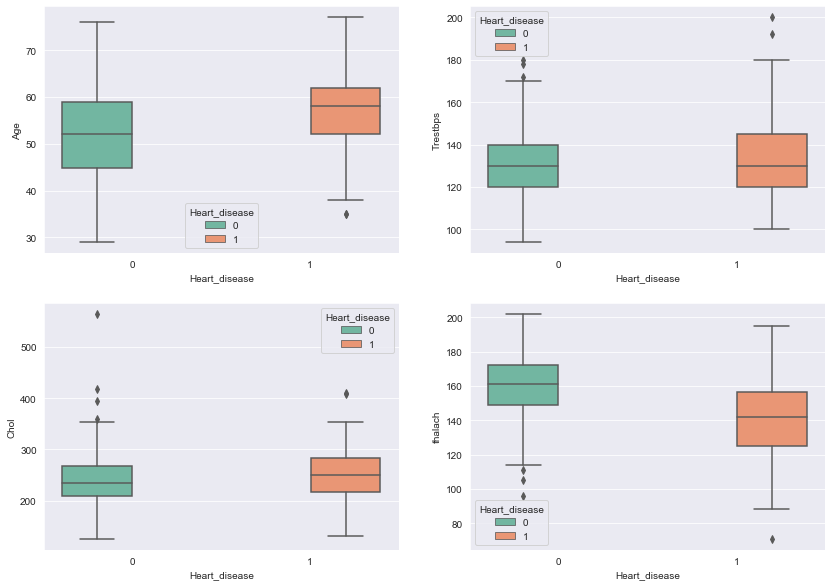

In [59]:
fig,ax=plt.subplots(2,2,figsize=(14,10))

sns.boxplot(x="Heart_disease",y="Age",data=df,hue="Heart_disease", palette='Set2',ax=ax[0,0])
sns.boxplot(x="Heart_disease",y="Trestbps",data=df,hue="Heart_disease", palette='Set2',ax=ax[0,1])
sns.boxplot(x="Heart_disease",y="Chol",data=df,hue="Heart_disease", palette='Set2',ax=ax[1,0])
sns.boxplot(x="Heart_disease",y="thalach",data=df,hue="Heart_disease", palette='Set2',ax=ax[1,1])

plt.show();



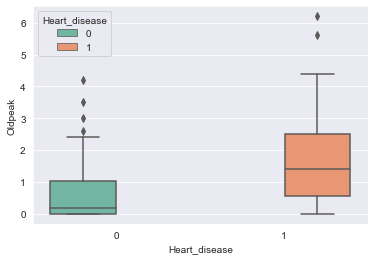

In [60]:
sns.boxplot(x="Heart_disease",y="Oldpeak",data=df,hue="Heart_disease", palette='Set2')
plt.show();

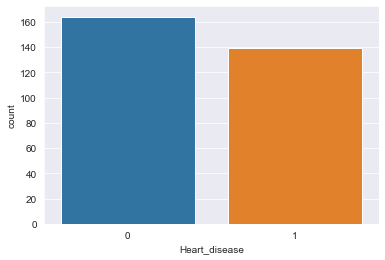

In [61]:
sns.countplot(df["Heart_disease"])

In [62]:
df.Heart_disease.value_counts(normalize=True)

0   0.54
1   0.46
Name: Heart_disease, dtype: float64